<a href="https://colab.research.google.com/github/WallaceSantos1989/MVP-Machine-Learning/blob/main/MVP_Sobreviventes_doTitanic_Wallace_Euz%C3%A9bio_dos_Santos_ultimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP Machine Learning - Wallace Euzébio dos Santos

## Abril, 2024

## Definição do Problema

### Prever a sobrevivência ao Titanic?

**Contexto:** Em 15 de abril de 1912, o maior navio de passageiros já fabricado colidiu com um iceberg durante sua viagem inaugural. Quando o Titanic afundou, matou 1.502 dos 2.224 passageiros e tripulantes. Esta tragédia chocou a comunidade internacional e levou à melhores regulamentações de segurança para os navios. Uma das razões pelas quais o naufrágio resultou em uma enorme perda de vidas foi a existência de poucos botes salva-vidas, para os passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido na sobrevivência ao naufrágio, alguns grupos de pessoas tiveram uma maior probabilidade de sobreviver do que outros.

O arquivo titanic.csv contém dados de 887 passageiros reais do Titanic. Cada linha representa uma pessoa. As colunas descrevem diferentes atributos sobre a pessoa, incluindo se ela sobreviveu, sua classe, seu nome, sexo (gênero), sua idade, se possuia irmãos ou conjuge à bordo, se possuia pais ou filhos a bordo, e a tarifa que pagaram.




**Objetivo** Prever quais passageiros sobreviveram ao naufrágio do Titanic, utilizando modelos de classificação.




**Estrutura:** O notebook está dividido assim:

1. Importação das bibliotecas e ferramentas necessárias
2. Acesso e tratamento dos dados que serão a entrada do modelo de Machine learning
3. Modelos para decidir quais as variáveies independentes
4. Separação em conjunto de treino e conjunto de teste com holdout
5. Modelagem e Inferência
6. Otimização dos hiperparâmetros
7. Finalização do Modelo


**Créditos:** O notebook foi adaptado a partir da seguinte fonte abaixo:
Uma probabilidade titânica. https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html.

**Dataset:** O dataset foi baixado do https://web.stanford.edu/ [Uma probabilidade titânica](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv).




###Análise exploratória dos dados do dataset:

Em um total de 887 pessoas:

- Sobreviventes:
 342 (38%) de 887 pessoas
 - 233 mulheres e 109 homens
 - 136 pessoas da 1ª Classe
 - 87 pessoas da 2ª Classe
 - 119 pessoas da 3ª Classe



- Não Sobreviventes:
 545 (62%) de 888 pessoas
 - 464 homens e 81 mulheres
 - 80 1ª Classe
 - 97  2ª Classe
 - 368 3ª Classe

 ## Conclusão da análise inicial :
 Podemos inferir por essa análise que menos da metade sobreviveu, em sua maioria as passageiras.

## 1.Importação das bibliotecas e ferramentas necessárias

No conjunto de códigos abaixo, serão realizadas todas as importações necessárias para que o notebook possa realizar uma grande variedade de tarefas comuns em aprendizado de máquina e análise de dados.

In [190]:
# Imports necessários:

import warnings
warnings.filterwarnings("ignore") # Configuração para não exibir os warnings

import seaborn as sns # É uma biblioteca que facilita a criacao de gráficos
import pandas as pd # Importar bibliotecas panda, utilizado para várias atividades e processos
import numpy as np # Biblioteca de código aberto destinada a realizar operações em arrays multidimensionais
import matplotlib.pyplot as plt # Biblioteca da linguagem de programação Python, utilizada para visualização de dados e plotagem gráfica

# Bibliotecas de aprendizado de máquina mais populares:
from sklearn.preprocessing import MinMaxScaler # Normalização
from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.preprocessing import OrdinalEncoder # Ordinal encoding
from sklearn.preprocessing import OneHotEncoder # One-hot encoding e dummy encoding
from sklearn.model_selection import train_test_split # Divide os dados em partições de teste e treino
from sklearn.model_selection import StratifiedKFold # Validação cruzada é uma técnica para avaliar modelos de ML
from sklearn.model_selection import cross_val_score # Muito utilizada para avaliação de desempenho de modelos de aprendizado de máquina
from sklearn.model_selection import GridSearchCV # Automatizar o processo de ajuste dos parâmetros de um algoritmo
from sklearn.metrics import accuracy_score # A acurácia é uma métrica comum usada para avaliar modelos de classificação
from sklearn.pipeline import Pipeline # O objetivo do pipeline é reunir as várias etapas do processo, que podem ser validadas de forma cruzada ao definir parâmetros diferentes
from sklearn.tree import DecisionTreeClassifier # É um aprendizado que acontece por meio de um esquema semelhante a uma árvore
from sklearn.neighbors import KNeighborsClassifier # Usado para classificar objetos com base em exemplos de treinamento que estão mais próximos no espaço de características
from sklearn.naive_bayes import GaussianNB # Frequentemente utilizado para classificar textos, como na detecção de spam ou na categorização de documentos
from sklearn.svm import SVC # Pode ser usado para dados separáveis linearmente e também não linearmente separáveis
from sklearn.ensemble import BaggingClassifier # É um meta-estimador que, com um modelo de classificação base, realiza vários treinamentos com subconjuntos aleatórios do dataset original
from sklearn.ensemble import RandomForestClassifier # Cria de forma aleatória várias Árvores de Decisão (Decision Trees) e combina o resultado de todas elas para chegar no resultado final
from sklearn.ensemble import AdaBoostClassifier # Inicialmente dá o mesmo peso para cada conjunto de dados. Em seguida, ajusta automaticamente os pesos dos pontos de dados após cada árvore de decisão
from sklearn.ensemble import GradientBoostingClassifier # Problemas de classificação, onde o objetivo é prever rótulos de classe discretos
from sklearn.ensemble import VotingClassifier # Classificador por votação
from sklearn.model_selection import KFold # Para preparar os folds da validação cruzada
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # Para a Seleção Univariada
from sklearn.feature_selection import f_classif # Para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # Para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.feature_selection import VarianceThreshold # Remover todos os recursos em que a variância não chegue até um certo limite
from sklearn.feature_selection import chi2 # Teste estatístico
from sklearn.feature_selection import SelectFromModel # Remover todas as features que não passem do threshold

#2.Acesso e tratamento dos dados que serão a entrada do modelo de Machine learning
##Preparação dos dados





Carga do Dataset - Foi feito todo o tratamento do dataset, onde podemos verificar as primeiras linhas e as últimas linhas.
Com isso entendemos se existem falhas no conjunto de dados, cada linha representa uma pessoa e de acordo com as colunas (atributos), se existem informações faltantes, o que prejuducaria a análise de todo o conjunto de dados.

In [191]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/WallaceSantos1989/P-s-Cientista-de-Dados/5c4510158694cbd716a7a53be702b17e75a5d76e/titanic%20(1).csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [192]:
# Verifica o final do conjunto de dados
dataset.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75





Nesta parte podemos observar todas as 8 colunas da tabela (Survived, Pclass, Name, Sex, Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare), o total de valores, se existem informações faltantes e o tipo de cada informação armanezada. A inteção é que todos os dados sejam numéricos, para que possamos trabalhar de forma mais eficiente.

In [193]:
# Exibe todas as informações
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Abaixo foram feitos alguns tratamentos, onde apagamos a coluna nome, considerada irrelevante para o estudo e também foi utilizado o One-Hot Encoding, para transformar variáveis categóricas nominais em  variáveis binárias representadas por 0 = male (masculino) e 1 = female (feminino). Desta forma conseguimos padronizar todo o conjunto de estudo com valores numéricos.

In [194]:
# Retirando a coluna nome e mudando valores de feminino e masculino para 1 e 0
dataset = dataset.drop(['Name'], axis=1)
dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})
dataset.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


O método describe() em um DataFrame do Pandas é utilizado para gerar estatísticas descritivas resumidas dos dados presentes no DataFrame, ele fornece informações úteis que ajudam a entender a distribuição e a identificar possíveis divergências no conjunto de informações.

Essas estatísticas são úteis para uma rápida análise exploratória, permitindo que se entenda a natureza e a distribuição do conteúdo antes de iniciar a modelagem ou qualquer análise mais detalhada.

Isso ajuda a identificar valores ausentes, outliers e entender melhor a escala e a variabilidade do conteúdo em cada coluna.

In [195]:
# Obter informações de três quartis, média, contagem, valores mínimo e máximo e desvio padrão do dataset
dataset.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


O código Python usando a biblioteca Seaborn abaixo, está criando um mapa de calor (heatmap) para visualizar os valores nulos no conjunto de dados dataset.

O sns.heatmap() é uma função da biblioteca Seaborn usada para criar visualizações de dados em forma de mapa de calor.

<Axes: >

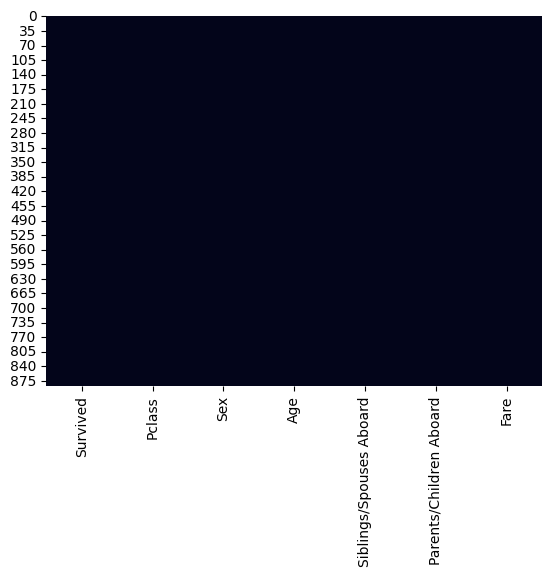

In [196]:
#Essa ferramenta ilustra que não existem espaços vazios ou valores, nulos ausentes no dataset
sns.heatmap(dataset.isnull(),cbar=False)

Podemos verificar o gráfico com os valores em porcentagem dos não sobreviventes e sobreviventes, existentes no dataset.

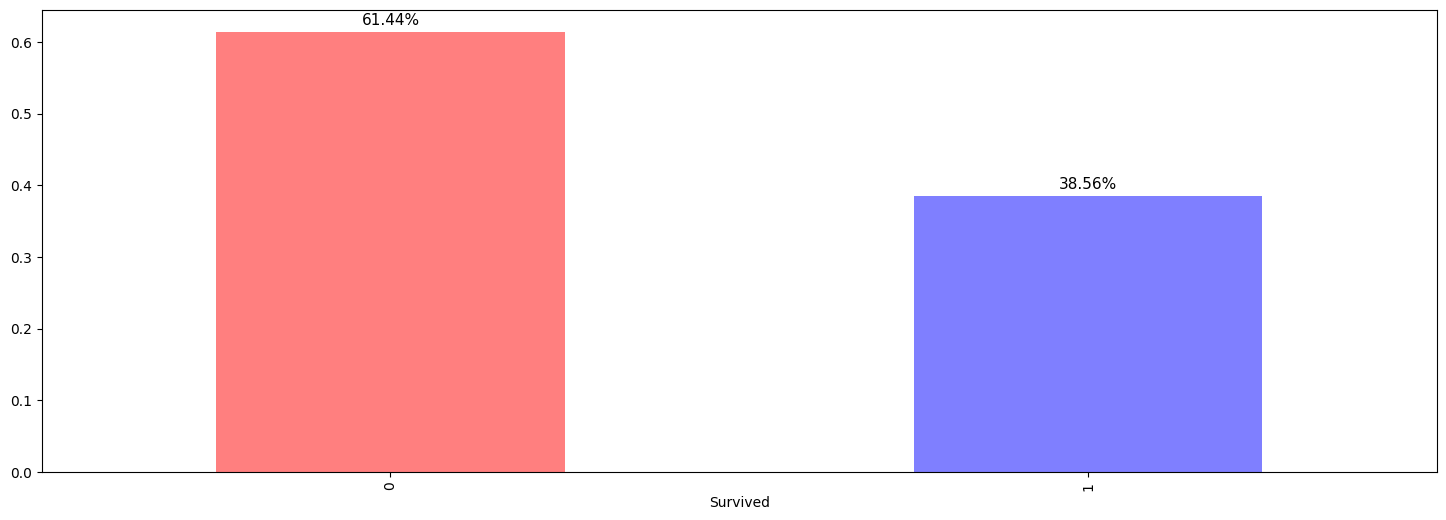

In [197]:
# Quantas pessoas sobreviveram? 38,56% sobreviveram, 61,44% morreram

# Definindo as cores para quem morreu e quem viveu
colors = ['red', 'blue']

# Criando a figura e definindo o tamanho
fig = plt.figure(figsize=(18, 6))

# Plotando o gráfico de barras com valores e cores personalizadas
plot = dataset['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=colors)

# Adicionando os valores nas barras
for i in plot.patches:
    plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.01,
              f'{round(i.get_height()*100, 2)}%',
              ha='center', fontsize=11, color='black')

# Mostrando o gráfico
plt.show()


Podemos avaliar e verificar o gráfico com os valores em porcentagem com a distribuição dos passageiros por classe que ocupavam no navio, 1ª, 2ª e 3ª Classe.



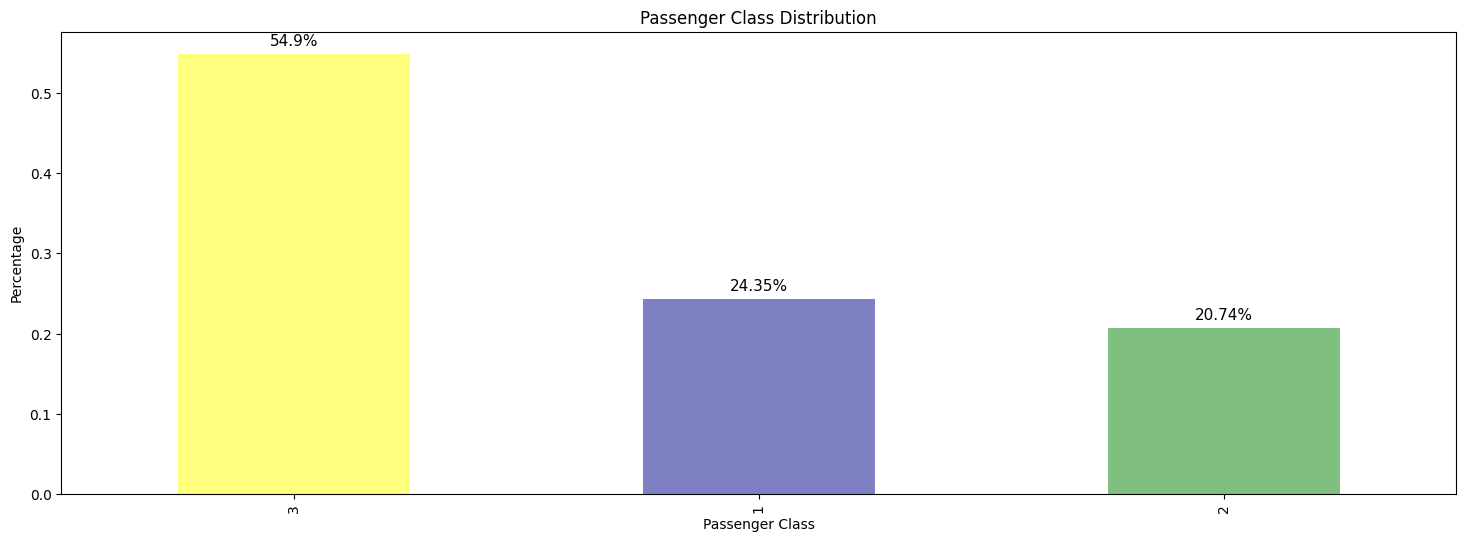

In [198]:
# Classe dos passageiros

# Definindo as cores para cada classe de passageiro
colors = ['yellow', 'darkblue', 'green']

# Criando a figura e definindo o tamanho
fig = plt.figure(figsize=(18, 6))

# Plotando o gráfico de barras com cores personalizadas
plot = dataset['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=colors)

# Adicionando os valores em porcentagem nas barras
for i in plot.patches:
    plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.01,
              f'{round(i.get_height()*100, 2)}%',
              ha='center', fontsize=11, color='black')

# Definindo rótulos e título do gráfico
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.title('Passenger Class Distribution')

# Mostrando o gráfico
plt.show()


Podemos observar uma relação de sobrevivência de acordo com gênero dos passageiros, feminino e maculino.

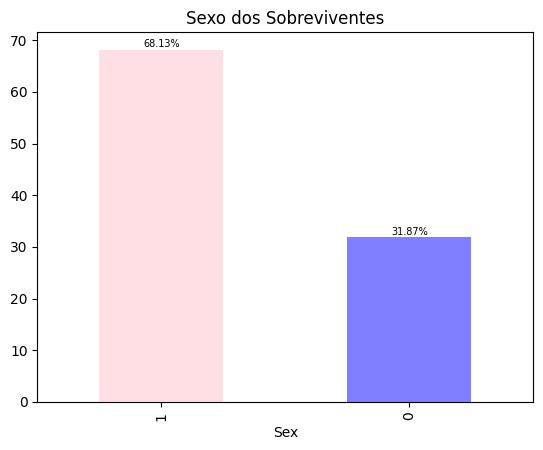

In [199]:
# Gráfico Mulher x Homem

# Define feminino rosa
female_color = 'pink'

# Calcula as porcentagens
survived_percentage = dataset.Sex[dataset.Survived == 1].value_counts(normalize=True) * 100

# Plotando o gráfico de barras
plot = survived_percentage.plot(kind='bar', alpha=0.5, color=[female_color, 'blue'])

# Adicionando os valores em porcentagem nas barras
for i in plot.patches:
    plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5,
              f'{round(i.get_height(), 2)}%',
              ha='center', fontsize=7, color='black')

# Adicionando título ao gráfico
plt.title("Sexo dos Sobreviventes")

# Exibindo o gráfico
plt.show()


Achei válido colocar esses gráficos, pois desde a análise exploratória inicial tive o entendimento que a classe em que o passageiro estava viajando e o sexo poderiam ser características importantes que pudessem de alguma forma influenciar na pergunta chave, quem sobreviveria?

No decorrer do notebook iremos realizar mais análises afim de enetender se esses rótulos que inicialmente se mostraram importantes de fato o são.

#3.Modelos para decidir quais as variáveies independentes
###Modelagem:
####Teremos vários modelos que nos ajudarão a entender quais as classes de maior importância para o entendimento da questão principal: quem sobreviveria?

Abaixo temos o conceito de limite de variância que é usado em algoritmos de seleção de recursos, para remover características que têm pouca variação nos dados.

Quando temos um conjunto de dados com muitas características (ou recursos), algumas dessas características podem não fornecer muita informação útil porque elas não variam muito entre as amostras. Em outras palavras, elas têm uma variância muito baixa.

Ao definir um limite de variância, você está estabelecendo um critério para decidir quais características manter e quais remover com base na quantidade de variação que elas têm. Se a variância de uma característica estiver abaixo desse limite, ela será considerada como tendo uma variação muito baixa e será removida do conjunto de dados.

Após a análise o algoritmo retirou a coluna target survived (sobreviveu) de valores binários e coluna sex (sexo), também de valores binários, logos podemos compreender que utilzar esse tipo de modelo com um conjuto de dados que contenham valores 0 e 1 não seja uma boa escolha, pois ele não terá uma variação valores em seus dados para criar parâmetros e realizar escolhas acertivas de acordo com o problema base.

In [200]:
##Limite de Variância
#Este algoritmo de seleção de recursos analisa apenas os recursos (X).

mdlsel = VarianceThreshold(threshold=0.5)
mdlsel.fit(dataset)
ix = mdlsel.get_support()
#data1 = mdlsel.transform(dataset)
data1 = pd.DataFrame(mdlsel.transform(dataset), columns = dataset.columns.values[ix])
data1.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


O código abaixo usa um modelo de regressão logística para avaliar a importância das características, em seguida seleciona características com base nessa importância.

Isso pode ajudar a identificar quais características são mais relevantes para a previsão da variável alvo (no caso, "Survived") de acordo com o modelo de regressão logística.

O modelo trouxe como características mais relevantes a Classe (Pclass) e Sexo	(Sex).

In [201]:
# Selecione do modelo (SelectFromModel) para regressão logística feature selction

X = dataset.drop("Survived",axis=1)
y = dataset["Survived"]

# Linear Model
linmdl = LogisticRegression()
linmdl.fit(X,y)
mdl = SelectFromModel(linmdl,prefit=True)
ix = mdl.get_support()
data3 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix])
data3.head(n=5)

,Pclass,Sex
0,3.0,0.0
1,1.0,1.0
2,3.0,1.0
3,1.0,1.0
4,3.0,0.0


O código abaixo utiliza a técnica "SelectKBest" para selecionar os melhores atributos com base em uma função de pontuação específica (f_classif neste caso), que é usada para calcular a relevância de cada atributo em relação à variável alvo.

Isso ajuda a reduzir a dimensionalidade do conjunto de dados, mantendo apenas os atributos mais importantes para a previsão.

No teste abaixo ele reduziu de 6 atributos para 4, dentre os quais apareceram novamente Classe (Pclass) e Sexo	(Sex).

In [202]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[1:7])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[1:7]))


Número original de atributos: 6

Número reduzido de atributos: 4

Atributos Originais: Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

Scores dos Atributos Originais: [113.028 368.416   3.162   1.219   5.714  62.16 ]

Atributos Selecionados: ['Pclass' 'Sex' 'Parents/Children Aboard' 'Fare']


A técnica de Importância de Atributos com ExtraTrees é usada para avaliar a contribuição de cada atributo para o modelo de classificação.

Isso pode ajudar a identificar os atributos mais importantes para a previsão da variável alvo e guiar a seleção de características.

Novamente o teste abaixo trouxe os atributos (Pclass) e Sexo (Sex).


In [203]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[1:7])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
[0.105 0.293 0.255 0.046 0.038 0.264]


__________________________________________________________________________________________________

#4.Separação em conjunto de treino e conjunto de teste com holdout

###Treinamento:

Este trecho de código está relacionado à preparação de dados e à validação de um modelo de aprendizado de máquina ele prepara os dados dividindo-os em conjuntos de treino e teste e configura a validação cruzada para avaliar o desempenho do modelo de aprendizado de máquina que será treinado posteriormente.

In [204]:
# Validação cruzada com estratificação
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,1:7] # atributos
y = array[:,0] # classe (target)
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

#5.Modelagem e Inferência

O código abaixo complementa a seção de treinamento ao realizar a construção e avaliação de vários modelos de aprendizado de máquina (machine learning) utilizando os dados de treinamento (`X_train` e `y_train`) que foram definidos anteriormente.

A função principal é:

1. **Definição e Avaliação de Modelos**: Ele define uma série de modelos de classificação, incluindo regressão logística, k-vizinhos mais próximos, árvore de decisão, Naive Bayes, SVM, entre outros. Em seguida, ele constrói e avalia esses modelos usando validação cruzada, onde a estratégia de validação cruzada é definida pelo objeto `kfold`.

2. **Pré-processamento e Avaliação**: Além disso, cria pipelines de pré-processamento de dados, onde os dados são escalados usando `StandardScaler` e `MinMaxScaler`, e os modelos são avaliados em três cenários diferentes: dados originais, dados padronizados e dados normalizados.

3. **Visualização dos Resultados**: Gera um boxplot para comparar o desempenho dos modelos nos diferentes cenários de pré-processamento de dados.

Em resumo, na modelagem e inferência iremos explorar e comparar o desempenho de uma variedade de modelos de machine learning em diferentes condições de pré-processamento de dados, usando os dados de treinamento fornecidos pelo treinamento.

### Criação e avaliação de modelos: linha base, dados padronizados e normalizados



LR-orig: 0.798 (0.032)
KNN-orig: 0.709 (0.052)
CART-orig: 0.772 (0.036)
NB-orig: 0.794 (0.043)
SVM-orig: 0.680 (0.043)
Bag-orig: 0.810 (0.031)
RF-orig: 0.810 (0.033)
ET-orig: 0.795 (0.028)
Ada-orig: 0.805 (0.043)
GB-orig: 0.827 (0.039)
Vot-orig: 0.787 (0.045)
LR-padr: 0.797 (0.033)
KNN-padr: 0.814 (0.033)
CART-padr: 0.772 (0.036)
NB-padr: 0.794 (0.043)
SVM-padr: 0.836 (0.039)
Bag-padr: 0.819 (0.036)
RF-padr: 0.810 (0.030)
ET-padr: 0.788 (0.027)
Ada-padr: 0.805 (0.043)
GB-padr: 0.827 (0.039)
Vot-padr: 0.834 (0.037)
LR-norm: 0.803 (0.036)
KNN-norm: 0.814 (0.027)
CART-norm: 0.773 (0.036)
NB-norm: 0.794 (0.043)
SVM-norm: 0.817 (0.035)
Bag-norm: 0.801 (0.047)
RF-norm: 0.808 (0.033)
ET-norm: 0.790 (0.027)
Ada-norm: 0.805 (0.043)
GB-norm: 0.827 (0.039)
Vot-norm: 0.817 (0.038)


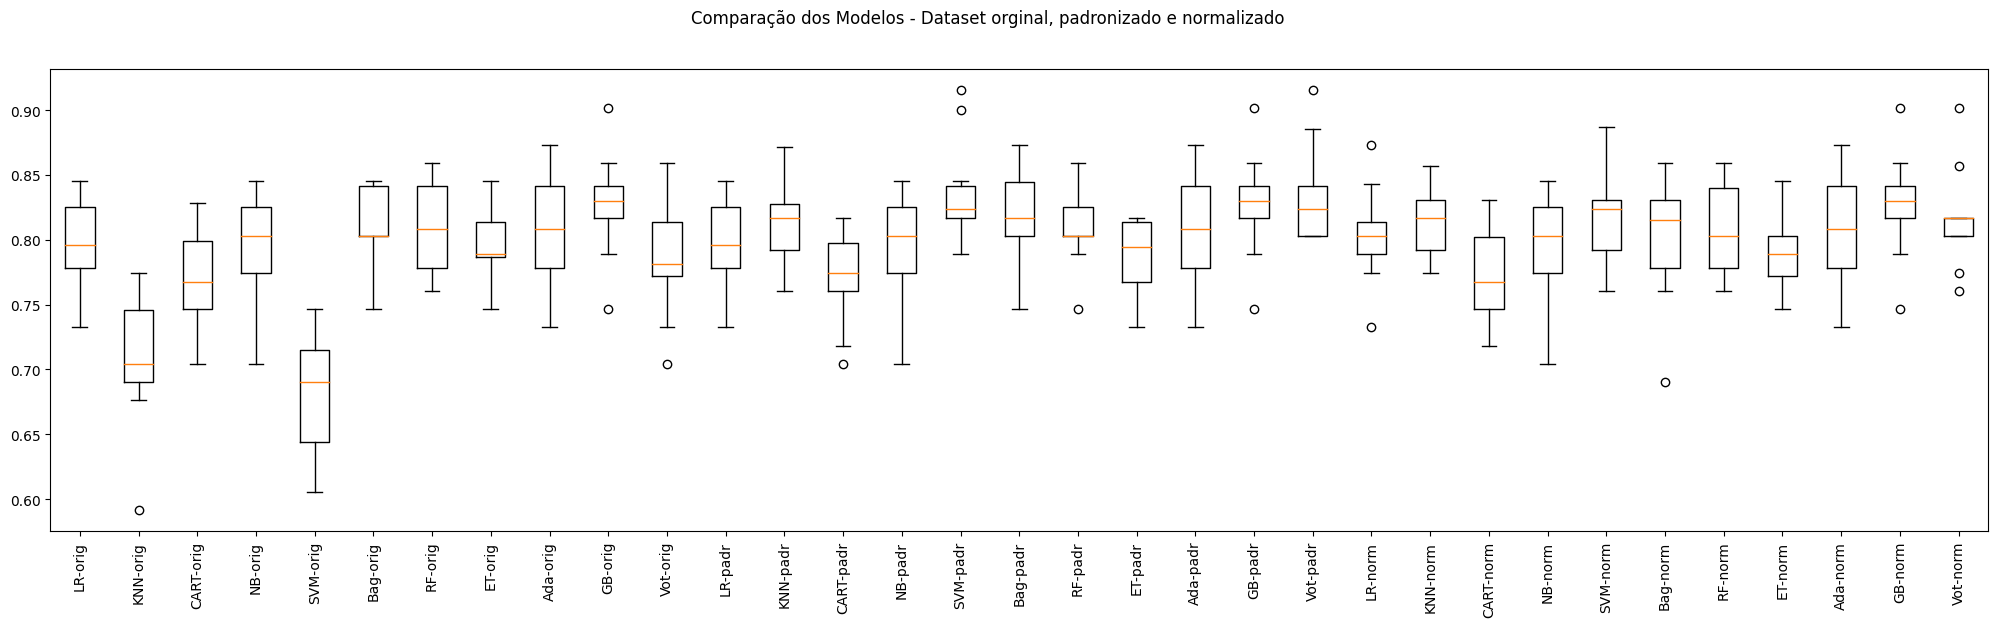

In [205]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Diefnindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

O modelo que teve o melhor resultado foi o **GB-orig** (Gradient Boosting) com uma média de precisão de aproximadamente 0.827 e um desvio padrão de 0.039. Isso significa que, em média, o modelo Gradient Boosting obteve uma precisão de 82.7% durante a validação cruzada com os dados originais, e o desvio padrão indica a consistência desse desempenho em diferentes partições dos dados.

-------

#6.Otimização dos hiperparâmetros

###Entendemos que o melhor algoritmo foi o Gradient Boosting

Utilizando um processo de ajuste de hiperparâmetros (tuning) para o modelo Gradient Boosting Classifier (GBC) usando diferentes métodos de pré-processamento de dados (normalização e padronização) e uma busca em grade (GridSearchCV) para encontrar a melhor combinação de hiperparâmetros para cada método de pré-processamento.

No geral, esse código automatiza o processo de seleção dos melhores hiperparâmetros para o modelo GBC, considerando diferentes técnicas de pré-processamento de dados. Isso ajuda a encontrar a configuração ótima que maximiza o desempenho do modelo.

In [206]:
# Tuning do gradient_boosting

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('gradient_boosting-orig', Pipeline(steps=[gradient_boosting])))
pipelines.append(('gradient_boosting-padr', Pipeline(steps=[standard_scaler, gradient_boosting])))
pipelines.append(('gradient_boosting-norm', Pipeline(steps=[min_max_scaler, gradient_boosting])))

param_grid = {
    'GB__n_estimators': [50, 100],  # Número de árvores na floresta
    'GB__learning_rate': [0.05, 0.1],  # Taxa de aprendizado
    'GB__max_depth': [3, 5],  # Profundidade máxima das árvores
    'GB__min_samples_split': [2, 5],  # Número mínimo de amostras necessárias para dividir um nó
    'GB__min_samples_leaf': [1, 2],  # Número mínimo de amostras necessárias para ser uma folha
    'GB__max_features': ['sqrt', 'log2'],  # Número máximo de features a serem consideradas para dividir um nó
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: gradient_boosting-orig - Melhor: 0.837867 usando {'GB__learning_rate': 0.05, 'GB__max_depth': 5, 'GB__max_features': 'log2', 'GB__min_samples_leaf': 2, 'GB__min_samples_split': 2, 'GB__n_estimators': 50}
Sem tratamento de missings: gradient_boosting-padr - Melhor: 0.840644 usando {'GB__learning_rate': 0.05, 'GB__max_depth': 5, 'GB__max_features': 'sqrt', 'GB__min_samples_leaf': 2, 'GB__min_samples_split': 2, 'GB__n_estimators': 50}
Sem tratamento de missings: gradient_boosting-norm - Melhor: 0.835070 usando {'GB__learning_rate': 0.05, 'GB__max_depth': 3, 'GB__max_features': 'log2', 'GB__min_samples_leaf': 1, 'GB__min_samples_split': 2, 'GB__n_estimators': 50}



A saída resume os resultados do ajuste de hiperparâmetros para três diferentes métodos de pré-processamento de dados (sem tratamento, padronização e normalização) usando o modelo Gradient Boosting Classifier. Cada método teve um conjunto específico de hiperparâmetros otimizados, resultando em pontuações de desempenho específicas. Os resultados ajudam a identificar qual método de pré-processamento e configuração de hiperparâmetros proporcionam o melhor desempenho para o modelo.

**Conseguimos identificar que o gradient_boosting-padr teve um melhor desempenho de 0.84 se comparado ao treino de 0.82.**

------------------------------------------------------

#7.Finalização do Modelo



Encapsula o pré-processamento dos dados (padronização) e a construção do modelo Gradient Boosting em um pipeline único, facilitando a reprodução e o treinamento do modelo.

In [207]:
# Configurando o pipeline do modelo

# Define global random seed
np.random.seed(7)

n_estimators = 50  # Número de árvores na floresta
learning_rate = 0.05  # Taxa de aprendizado
max_depth = 5  # Profundidade máxima das árvores
min_samples_split = 2  # Número mínimo de amostras necessárias para dividir um nó
min_samples_leaf = 2 # Número mínimo de amostras necessárias para ser uma folha
max_features = 'sqrt'  # Número máximo de features a serem consideradas para dividir um nó

standard_scaler = ('StandardScaler', StandardScaler())

# pipeline
model = Pipeline([standard_scaler, ('GB', GradientBoostingClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, learning_rate=learning_rate, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf))])

# treinamento
model.fit(X_train,y_train)


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('GB',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            max_features='sqrt',
                                            min_samples_leaf=2,
                                            n_estimators=50))])

_____________________________________________________________


Faz a predição das classes dos dados de teste usando o modelo treinado e calcula a acurácia do modelo com base nessas previsões e nas classes verdadeiras dos dados de teste.

In [209]:
# Predicao

# Predicao dos dados nao vistos (teste)
prediction = model.predict(X_test)

# Acuracia
acuracia = accuracy_score(y_test, prediction)

# Resultado
print("Acuracia: %0.3f" % acuracia)

Acuracia: 0.826


Se a acurácia do modelo no conjunto de teste (0.82) é muito próxima à acurácia no conjunto de teste padrinozada (0.84), isso sugere que o modelo está generalizando. Quando a diferença entre as métricas de desempenho no treinamento e no teste é pequena, é um indicativo de que o modelo não está sofrendo de overfitting significativo.

______________________________________________________________________________


#8.Conclusão:

Neste projeto utilizamos um conjunto de dados reais com 887 passageiros que de fato estiveram no Titanic, na tentativa de prever quem sobreviveria ao naufrágio de acordo com as informações presentes no dataset.

Inialmente tratamos os dados, garantindo que não existiam espaços vazios de acorodo com o atributos, onde cada linha representava um passageiro, com as seguintes informações: se ela sobreviveu, sua classe, seu nome, sexo (gênero), sua idade, se possuia irmãos ou conjuge à bordo, se possuia pais ou filhos a bordo, e a tarifa que pagaram.

A coluna nome foi apagada, pois idntificamos ser irrelavante essa informação para análise, foi utilizado o One-Hot Encoding, para transformar variáveis categóricas nominais em variáveis binárias representadas por 0 = male (masculino) e 1 = female (feminino). Desta forma conseguimos padronizar todo o conjunto de estudo com valores numéricos.

Apresentamos alguns gráficos afim demosntrar alguns atributos de forma comparativa, trazendo mais informações visuais e de fácil entendimento ao projeto.

Utilizamos modelos para decidir as variáveis independetes, e chegamos as que possivelmente nos trariam um resultado mais específico, a Classe e o Sexo, foram as que apareceram com mais frequência nos modelos utilizados.

Por fim começamos de fato a trabalhar com os algoritmos separamos em treino e teste. Na modelagem comparamos o desempenho de uma variedade de modelos de machine learning em diferentes condições de pré-processamento de dados, usando os dados de treinamento e entendemos que no treino o Gradient Boosting teve a melhor acurácia.

Algumas conclusões importantes:

Os resultados não parecem indicar overfitting, pois as métricas estão de acordo com o que foi observado no treinamento.

O fato de utilizarmos com menor frequência rótulos do dataset como: idade, se possuia irmãos ou conjuge à bordo, se possuia pais ou filhos a bordo, e a tarifa que pagaram, pode ser devido a um quantidade pequena de informações se comparadas ao valor real de passageiros.

Embora o projeto consiga trazer uma previsão considerável sobre quem sobreveria ao naufrágio, uma quantidade maior de linhas (pessoas), poderia alterar a representatividade de outros rótulos como: se possuia irmãos ou conjuge à bordo, se possuia pais ou filhos a bordo, provavelmente teriam um peso maior.

Ficou claro que as passageiras e pessoas das classes mais altas teriam a maior chance de sobrevivência.

**Sobreviventes: 342 (38%) de 887 pessoas**

233 mulheres e 109 homens

1ª Classe - 136 pessoas, 91 mulheres, 45 homens

2ª Classe - 87 pessoas, 70 mulheres, 17 homens

3ª Classe - 119 pessoas, 72 mulheres, 47 homens


**Não Sobreviventes: 545 (62%) de 887 pessoas**

81 mulheres e 464 homens

1ª Classe - 80

2ª Classe - 97

3ª Classe - 368



